
# Scrape data dari berita online (DETIK.COM)



*   Menggunakan Library BeautifulSoap
*  Data yang akan di Scrape ada detik.com
*  Ouput yang diharapkan adalan Judul berita dan isi berita dalam format Csv


Link dapat di run di : 
https://colab.research.google.com/drive/1C_TlXBiOwX2CURAhzWvm1RKT3dD9wJDC?usp=sharing

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

In [2]:
def scrape_detik(hal):
    global hades
    a = 1
    for page in range(1,hal):
        url = f'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page={page}'
        ge = req.get(url,hades).text
        sop = bs(ge,'lxml')
        li = sop.find('div',class_='list media_rows list-berita')
        lin = li.find_all('article')
        for x in lin:
            link = x.find('a')['href']
            headline = x.find('a').find('h2').text
            ge_ = req.get(link,hades).text
            sop_ = bs(ge_,'lxml')
            content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
            for x in content:
                x = x.find_all('p')
                y  = [y.text for y in x ]
                content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
                print(f'done[{a}] > {headline[0:10]}')
                a += 1
                with open('politik.csv','a')as file:
                    wr = csv.writer(file, delimiter=',')
                    wr.writerow([headline,content_])

In [3]:
scrape_detik(3)

done[1] > Gus Muhaim
done[2] > Sudirman S
done[3] > Jabar Hari
done[4] > Sudirman S
done[5] > Partai Gel
done[6] > Anies Duku
done[7] > Ketua DPP 
done[8] > Bupati Ken
done[9] > Projo Beri
done[10] > Demokrat: 
done[11] > Pastikan P
done[12] > Duet Anies
done[13] > Relawan Jo
done[14] > Besok, PKS
done[15] > Paloh Ceri
done[16] > Elektabili
done[17] > Cak Imin B
done[18] > Ganjar Ung


Scrape_detik(3) disini berarti, anda akan scrape data website dengan jumlah 3 halaman

Setelah proses tersebut, File akan disimpan secara otomatis, 
anda bisa mendownloadnya


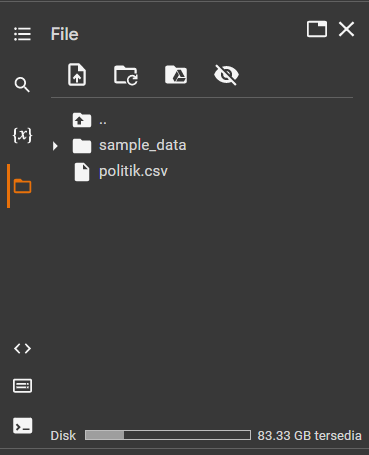

In [4]:
import pandas as pd
# Memuat file CSV sebagai dataframe
df = pd.read_csv('politik.csv')

In [5]:
# Menampilkan dataframe menggunakan fungsi display()
display(df)

Gus Muhaimin Ingin Kebudayaan Jadi Panglima Pembangunan Bangsa  \
0   Sudirman Said soal Anies Merosot di Survei Kom...               
1   Jabar Hari Ini: Hukuman Lebih Berat untuk Doni...               
2   Sudirman Said: Anies Perlu Waktu dan Ketenanga...               
3   Partai Gelora Pede Jabar Jadi Lumbung Suara di...               
4   Anies Dukung Sistem Pemilu Terbuka: Lebih Baik...               
5   Ketua DPP Golkar Tolak Sistem Coblos Partai: B...               
6   Bupati Kendal Dico Temui Gibran di Solo, Kaget...               
7   Projo Beri Selamat JoMan Dukung Prabowo di Pil...               
8   Demokrat: Kasihan Koalisi Lain, Nama Capresnya...               
9   Pastikan Pemilih Meninggal, Petugas Pantarlih ...               
10  Duet Anies-Sandi Mencuat di Survei Voxpol, PKS...               
11  Relawan Jokowi Akan Gelar Musra Lagi di 11 Pro...               
12  Besok, PKS Deklarasi Resmi Anies Baswedan Capr...               
13  Paloh Cerita Kunjungi PKS Sebelum Berkoalisi, ...               
14  Elektabilitas NasDem Melesat Naik, Surya Paloh...               
15  Cak Imin Beber Alasan Koalisi Gerindra-PKB Bel...               
16  Ganjar Unggul Versi Litbang Kompas, PDIP Tetap...               

   Ketua Umum Partai Kebangkitan Bangsa (PKB) Abdul Muhaimin Iskandar (Gus Muhaimin) menginginkan agar kebudayaan dijadikan sebagai panglima dalam pembangunan bangsa ke depan."Kayaknya kita orientasi yang paling efektif ya budaya sebagai panglima karena ini menyentuh semua aspek: seni, tradisi, ekonomi semua ada di budaya," ujar Gus Muhaimin menanggapi aspirasi para seniman dan budayawan lokal se-Jatim di sela penyerahan Mandat Seniman untuk Indonesia 'Budal Gus' di Padepokan Seni Kirun, Madiun, Rabu (22/2/2023).Dikatakan Gus Muhaimin, di masa Bung Karno, politik dijadikan sebagai panglima. Bahkan, pertunjukan ludruk saat itu dilarang. Selanjutnya, pada era Orde Baru di bawah Presiden Soeharto, ekonomi yang dijadikan sebagai panglima pembangunan.\r    \r  \r        \r  "Reformasi nggak ada panglimanya sehingga tidak punya arah. Kalau mau punya arah budaya harus jadi panglima karena semua sendi kehidupan ujung-ujungnya budaya yang bisa menguatkan, mengokohkan dan mempersatukan," tuturnya.Menurutnya, kondisi saat ini di masa pancaroba akibat pandemi, budaya bisa menjadi pencegah terjadinya konflik, kekerasan, dan perpecahan. Apalagi mendekati kompetisi Pemilu 2024. Karena itu, Gus Muhaimin meminta pemerintah pusat dan pemda untuk benar-benar memperhatikan nasib para seniman tradisional."Seniman-seniman daerah yang hidupnya tentu sangat sulit terutama di era teknologi media sosial seperti sekarang harus ada bantuan-bantuan langsung maupun yang sifatnya promosi dan peningkatan kapasitas," katanya.Gus Muhaimin berharap Kementerian Pendidikan, Kebudayaan Riset dan Teknologi memberikan perhatian kepada para seniman dan budayawan lokal."Tolong Menteri Pendidikan dan Kebudayaan agar memperhatikan. Kepada Pemda tolong beri perhatian khusus, beri ruang atau panggung. Kalau perlu buatlah pertunjukan-pertunjukan yang menampilkan mereka karena selama ini mereka berjasa mempersatukan bangsa kita, berjasa membuat hiburan dan kebahagiaan di tingkat grassroot yang itu tidak bisa diperankan oleh orang lain ataupun negara," katanya.Wakil Ketua DPR Bidang Korkesra ini mengatakan bahwa harus ada upaya untuk meningkatkan mutu produk budaya Indonesia yang sesuai dengan perkembangan zaman dan aplikatif terhadap perkembangan teknologi informasi."Dengan begitu kita tidak kalah dengan Korea yang sebetulnya jauh di bawah kita kualitas dan varian kesenian budayanya, tapi karena mereka lebih aplicable dengan teknologi informasi sehingga seolah-olah kita di bawahnya," katanya.Gus Muhaimin menegaskan kesiapannya untuk bersama-sama memajukan kesenian dan nasib para seniman jika diberikan mandate sebagai pemimpin nasional ke depan."Intinya mari kita bekerjasama menuju Indonesia yang mencintai seniman. (Kalau saya jadi presiden) tandak, ludruk se